<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/database-exercise-bastienm69/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:** Maillet Bastien

**Student Number:** 400677332

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [3]:
import pandas as pd

df = pd.read_csv('/content/dataENG.csv', sep=';')
display(df)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,09/04/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,03/08/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,02/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,06/10/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [4]:
# Missing values accross all columns
missing_values = df.isnull().sum()
print("Missing values per column :")
print(missing_values)


Missing values per column :
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
#Strategy is to delete ligns with missing datas
df.dropna(inplace=True)

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [6]:
# Identify
constant_columns = df.columns[df.nunique() == 1]
print("Colonnes constantes :", constant_columns.tolist())

# Delete
df_cleaned = df.drop(columns=constant_columns)

# Verify
num_columns_remaining = df_cleaned.shape[1]
print(f"Nombre de colonnes restantes : {num_columns_remaining}")

Colonnes constantes : ['Z_CostContact', 'Z_Revenue']
Nombre de colonnes restantes : 27


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [7]:
from datetime import datetime

# Convert the column to the good format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed', dayfirst=True)

# Get today's date
today = datetime.today()

# Add the column and show
df["Customer_Days"] = (today - df["Dt_Customer"]).dt.days
print(df[["Dt_Customer", "Customer_Days"]].head())

  Dt_Customer  Customer_Days
0  2012-04-09           4944
1  2014-08-03           4098
2  2013-08-21           4445
3  2014-10-02           4038
4  2014-01-19           4294


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

Distribution of Education Category Counts:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


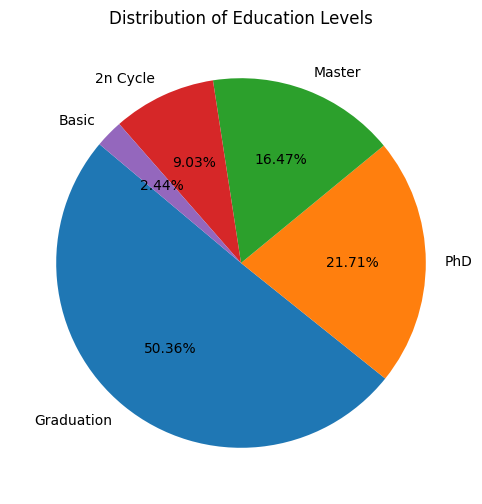


Marital Status Category Counts:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


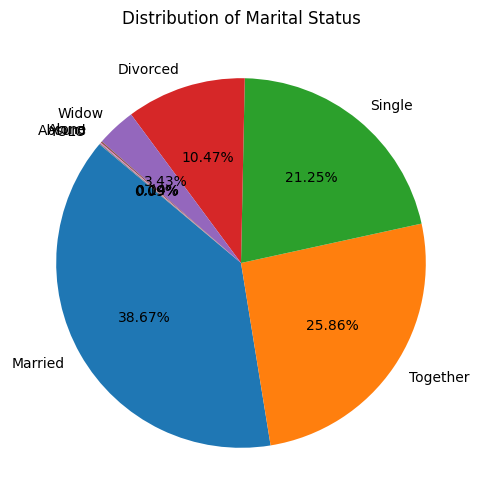

In [8]:
import matplotlib.pyplot as plt

# Analyze Education
education_counts = df['Education'].value_counts()
print("Distribution of Education Category Counts:")
print(education_counts)

plt.figure(figsize=(6,6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.show()

# Analyze Marital_Status
marital_status_counts = df['Marital_Status'].value_counts()
print("\nMarital Status Category Counts:")
print(marital_status_counts)

plt.figure(figsize=(6,6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Marital Status')
plt.show()

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

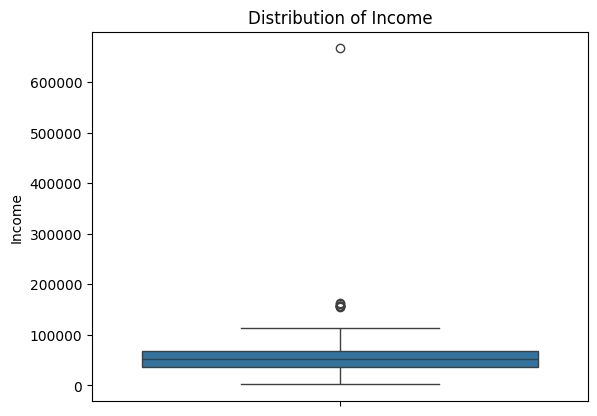

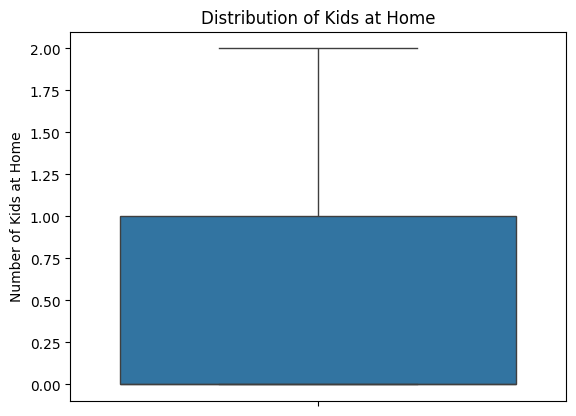

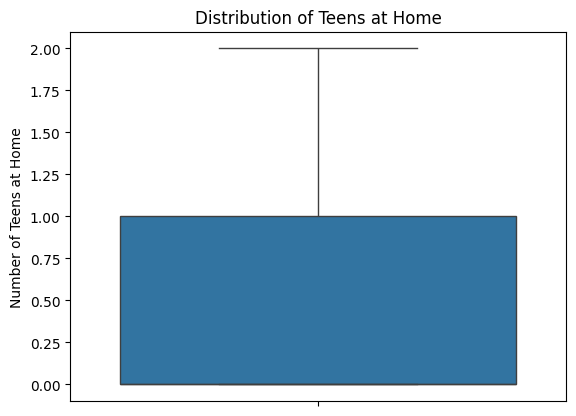

In [9]:
import seaborn as sns

# Boxplot for Income
sns.boxplot(y=df['Income'])
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.show()

# Boxplot for Kidhome
sns.boxplot(y=df['Kidhome'])
plt.title('Distribution of Kids at Home')
plt.ylabel('Number of Kids at Home')
plt.show()

# Boxplot for Teenhome
sns.boxplot(y=df['Teenhome'])
plt.title('Distribution of Teens at Home')
plt.ylabel('Number of Teens at Home')
plt.show()

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [10]:
# Define
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate
total_spending = df[spending_cols].sum()

# Find the product with the highest total spending
highest_spending_product = total_spending.idxmax()
highest_spending_amount = total_spending.max()

print("Total spending by product category:")
print(total_spending)

print(f"\nThe product with the highest total spending is '{highest_spending_product}' with a total of {highest_spending_amount:.2f}")

Total spending by product category:
MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64

The product with the highest total spending is 'MntWines' with a total of 676083.00


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used AI with the French site called "Mistral IA" in order to help me when I was wrong in my first ideas because he can show me why I am wrong and how I can modify the code to have the perfect final.